# Let's do some data exploration

In [2]:
import sys
import sysconfig
import platform

print("Python executable:", sys.executable)
print("Python version:", platform.python_version())
print("Base prefix:", sys.base_prefix)
print("sys.path:", sys.path[:3])  # show the first few paths


Python executable: c:\Users\ad\OneDrive - Alana Capital\Desktop\Arthur\code\company_outreach\job-application-automation\.venv\Scripts\python.exe
Python version: 3.13.7
Base prefix: C:\Program Files\Python313
sys.path: ['C:\\Program Files\\Python313\\python313.zip', 'C:\\Program Files\\Python313\\DLLs', 'C:\\Program Files\\Python313\\Lib']


In [3]:
import pandas as pd
import json
import seaborn as sns
import requests
import glob

ModuleNotFoundError: No module named 'seaborn'

In [262]:
city='geneva'

path = glob.glob(f'./data/{city}*.json')[0]

print(path)

./data/geneva_companies_from_1788_Capital_S.A._to_Zeno_SA.json


In [263]:
with open(path) as fp:
    dict_data = json.load(fp)


## Profiles and Linkedin

In [264]:
master_dict = {}
dict_profiles = {k:False for k in dict_data.keys()}

for key in dict_data.keys():
    try: 
        data = dict_data[key]['knowledge_graph']['profiles']
        print(data)
        dict_profiles[key] = data
    except:
        print(f'No profile section for {key}')

#master_dict['profiles'] = dict_profiles

[{'name': 'LinkedIn', 'link': 'https://www.linkedin.com/company/1788-capital', 'image': 'https://serpapi.com/searches/67d70475b10a9afb5518ef9d/images/71116143389fda70affefc688f2c34d657a9b49348ed7e6af17f13bba1f1b586da26191328a9ce8d.png'}]
No profile section for 2C Advisors Sarl
No profile section for 3T Family Office SA
[{'name': 'LinkedIn', 'link': 'https://ch.linkedin.com/company/a-t-alpha-credit-sa', 'image': 'https://serpapi.com/searches/67d7047a8c19e6f208eae936/images/39620c468cb913ad60ce1ccd4de79aaa547ccf917293ed763bf116ce90f09b8ee1027726720bec13.png'}]
[{'name': 'Instagram', 'link': 'https://www.instagram.com/abeloo.swiss/', 'image': 'https://serpapi.com/searches/67d7047ec60aef0a1e64f484/images/900ad871a36e571f13d7e98efdeadfa5d5327b601e5758e8e8d858fa5f1b2fa9184be8239d943b9e.png'}]
[{'name': 'LinkedIn', 'link': 'https://www.linkedin.com/company/accuratewealthmanagement', 'image': 'https://serpapi.com/searches/67d7048011a4da0b91ad9ac1/images/6675e10a4e315d1161fe161bff632df6e21be76a

In [265]:
pd.DataFrame(list(dict_profiles.items()), columns=['name', 'profile_exist'])

,name,profile_exist
0,1788 Capital S.A.,"[{'name': 'LinkedIn', 'link': 'https://www.lin..."
1,2C Advisors Sarl,False
2,3T Family Office SA,False
3,A&T Alpha Credit SA,"[{'name': 'LinkedIn', 'link': 'https://ch.link..."
4,Abeloo SA,"[{'name': 'Instagram', 'link': 'https://www.in..."
...,...,...
334,Wibagest SA,False
335,WM Capital SA,False
336,WOODSTONE CAPITAL SA,False
337,Z Impact Ventures SA,False


In [266]:
res = set()

for key in dict_profiles.keys():
    if dict_profiles[key] != False:
        for elem in dict_profiles[key]:
            res.add(elem['name'])

In [267]:
res

{'Facebook', 'Instagram', 'LinkedIn', 'X (Twitter)', 'YouTube'}

In [268]:
dict_linkedin = {k:False for k in dict_data.keys()}

for key in dict_profiles.keys():
    if dict_profiles[key] != False:
        for elem in dict_profiles[key]:
            if elem['name'] == 'LinkedIn':
                dict_linkedin[key] = elem['link']

master_dict['linkedin'] = dict_linkedin

## Websites and domains 

In [269]:
dict_domain = {k:False for k in dict_data.keys()}
dict_websites = {k:False for k in dict_data.keys()}

for key in dict_data.keys():
    try: 
        data = dict_data[key]['knowledge_graph']['website'].split('/')[2]
        data_website = dict_data[key]['knowledge_graph']['website']
        print(data)
        if data != 'www.google.com':
            dict_domain[key] = data
            dict_websites[key] = data_website
        else:
            print('Google as a website !')
    except:
        print(f'No website section for {key}')

master_dict['domain'] = dict_domain
master_dict['website'] = dict_websites

www.1788capital.com
No website section for 2C Advisors Sarl
www.3tfamilyoffice.com
alpha-credit.ch
abeloo.swiss
www.accuratewealth.ch
No website section for ACE TRUSTEES SA
www.addvisionpartners.com
No website section for ADN FINANCE SA
No website section for Advantage Family Office Services SA
No website section for Advantage Finance SA
No website section for Agave Advisors SA
No website section for Agence Suisse Du Patrimoine SA
www.alafcapital.com
No website section for Alana Capital SA (en formation)
No website section for Alex Morgenbesser - Yekara
No website section for Alkimia SA
alliance-partners.ch
almadacap.com
No website section for Alpha Blue Sky Management SA
www.alphamatrix.ch
No website section for AlphaSwiss Partners SA
No website section for Alston Capital Sàrl
No website section for Alternative Investment Solutions SA
No website section for ALTITUDE INVESTMENT SOLUTIONS SA
www.altor-capital.com
No website section for Alyeska Advisors SA
No website section for Amerys S

In [270]:
# dict_websites = {k:False for k in dict_data.keys()}

# for key in dict_data.keys():
#     try: 
#         data = dict_data[key]['knowledge_graph']['website']
#         print(data)
#         dict_websites[key] = data
#     except:
#         print(f'No website section for {key}')

# master_dict['website'] = dict_websites


## Employees with their emails

In [271]:
def count_email_domain(domain):

    url_count = f'https://api.hunter.io/v2/email-count?domain={domain}'

    answer = requests.get(url_count).json()

    return answer

In [272]:
dict_employees = {k:False for k in dict_data.keys()}

for key in dict_profiles.keys():
    if dict_domain[key] != False:
        dict_employees[key] = count_email_domain(dict_domain[key])

In [273]:
dict_employees_number = {k: False for k in dict_data.keys()}
dict_employees_generic = {k: False for k in dict_data.keys()}
dict_employees_personal = {k: False for k in dict_data.keys()}
dict_employees_exec = {k: False for k in dict_data.keys()}
dict_employees_exec_dep = {k: False for k in dict_data.keys()}


for key in dict_employees.keys():
    if dict_employees[key] != False:    
        if dict_employees[key]['data']['total'] != 0:
            dict_employees_number[key] = dict_employees[key]['data']['total']
            dict_employees_personal[key] = dict_employees[key]['data']['personal_emails']
            dict_employees_generic[key] = dict_employees[key]['data']['generic_emails']
            dict_employees_exec[key] = dict_employees[key]['data']['seniority']['executive']
            dict_employees_exec_dep[key] = dict_employees[key]['data']['department']['executive']

master_dict['total_emails'] = dict_employees_number
master_dict['generic_emails'] = dict_employees_generic
master_dict['personal_emails'] = dict_employees_personal
master_dict['executive_emails'] = dict_employees_exec
master_dict['executive_emails_department'] = dict_employees_exec_dep

In [274]:
dict_employees

{'1788 Capital S.A.': {'data': {'total': 1,
   'personal_emails': 1,
   'generic_emails': 0,
   'department': {'executive': 0,
    'it': 0,
    'finance': 1,
    'management': 0,
    'sales': 0,
    'legal': 0,
    'support': 0,
    'hr': 0,
    'marketing': 0,
    'communication': 0,
    'education': 0,
    'design': 0,
    'health': 0,
    'operations': 0},
   'seniority': {'junior': 0, 'senior': 0, 'executive': 1}},
  'meta': {'params': {'domain': '1788capital.com',
    'company': None,
    'type': None}}},
 '2C Advisors Sarl': False,
 '3T Family Office SA': {'data': {'total': 1,
   'personal_emails': 1,
   'generic_emails': 0,
   'department': {'executive': 1,
    'it': 0,
    'finance': 0,
    'management': 0,
    'sales': 0,
    'legal': 0,
    'support': 0,
    'hr': 0,
    'marketing': 0,
    'communication': 0,
    'education': 0,
    'design': 0,
    'health': 0,
    'operations': 0},
   'seniority': {'junior': 0, 'senior': 0, 'executive': 1}},
  'meta': {'params': {'domain':

## Phone number and addresses

In [275]:
dict_phone_number = {k:False for k in dict_data.keys()}

for key in dict_data.keys():
    try: 
        data = dict_data[key]['knowledge_graph']['phone']
        print(data)
        dict_phone_number[key] = data
    except:
        print(f'No phone section for {key}')

master_dict['phone_number'] = dict_phone_number


+41 22 317 40 50
No phone section for 2C Advisors Sarl
+41 22 732 11 33
+41 22 519 12 50
+41 22 700 92 92
No phone section for ACCURATE WEALTH MANAGEMENT SA
No phone section for ACE TRUSTEES SA
No phone section for ADDVISION WEALTH MANAGEMENT SA
No phone section for ADN FINANCE SA
No phone section for Advantage Family Office Services SA
No phone section for Advantage Finance SA
No phone section for Agave Advisors SA
No phone section for Agence Suisse Du Patrimoine SA
+41 22 566 88 84
No phone section for Alana Capital SA (en formation)
No phone section for Alex Morgenbesser - Yekara
No phone section for Alkimia SA
+41 22 715 00 70
+41 22 310 16 18
No phone section for Alpha Blue Sky Management SA
+41 22 552 58 40
No phone section for AlphaSwiss Partners SA
No phone section for Alston Capital Sàrl
No phone section for Alternative Investment Solutions SA
No phone section for ALTITUDE INVESTMENT SOLUTIONS SA
+41 22 310 58 55
No phone section for Alyeska Advisors SA
No phone section for Am

In [276]:
dict_address = {k:False for k in dict_data.keys()}

for key in dict_data.keys():
    try: 
        data = dict_data[key]['knowledge_graph']['address']
        print(data)
        dict_address[key] = data
    except:
        print(f'No address section for {key}')

master_dict['address'] = dict_address


Rue du Rhône 114, 1204 Genève, Switzerland
No address section for 2C Advisors Sarl
Rue du Conseil-Général 16, 1205 Genève, Switzerland
Quai des Forces-Motrices 14, 1204 Genève, Switzerland
Rue François-Versonnex 7, 1207 Genève, Switzerland
Quai de l'Ile 15, 1204 Genève, Switzerland
No address section for ACE TRUSTEES SA
No address section for ADDVISION WEALTH MANAGEMENT SA
No address section for ADN FINANCE SA
No address section for Advantage Family Office Services SA
No address section for Advantage Finance SA
No address section for Agave Advisors SA
No address section for Agence Suisse Du Patrimoine SA
Quai des Bergues 23, 1201 Genève, Switzerland
No address section for Alana Capital SA (en formation)
No address section for Alex Morgenbesser - Yekara
No address section for Alkimia SA
Rue Verdaine 11, 1204 Genève, Switzerland
Rue Jean-Petitot 2, 1204 Genève, Switzerland
No address section for Alpha Blue Sky Management SA
Rue de la Croix-d'Or 17A, 1204 Genève, Switzerland
No address se

## Saving the df

In [277]:
df = pd.DataFrame(master_dict).reset_index(names='name')
    

In [278]:
df = df[df['website'] != False]

In [286]:
df.head(10)

,name,linkedin,domain,website,total_emails,generic_emails,personal_emails,executive_emails,executive_emails_department,phone_number,address
0,1788 Capital S.A.,https://www.linkedin.com/company/1788-capital,www.1788capital.com,https://www.1788capital.com/,1,0,1,1,0,+41 22 317 40 50,"Rue du Rhône 114, 1204 Genève, Switzerland"
2,3T Family Office SA,False,www.3tfamilyoffice.com,http://www.3tfamilyoffice.com/,1,0,1,1,1,+41 22 732 11 33,"Rue du Conseil-Général 16, 1205 Genève, Switze..."
3,A&T Alpha Credit SA,https://ch.linkedin.com/company/a-t-alpha-cred...,alpha-credit.ch,http://alpha-credit.ch/,3,1,2,1,2,+41 22 519 12 50,"Quai des Forces-Motrices 14, 1204 Genève, Swit..."
4,Abeloo SA,False,abeloo.swiss,https://abeloo.swiss/,3,1,2,0,1,+41 22 700 92 92,"Rue François-Versonnex 7, 1207 Genève, Switzer..."
5,ACCURATE WEALTH MANAGEMENT SA,https://www.linkedin.com/company/accuratewealt...,www.accuratewealth.ch,https://www.accuratewealth.ch/,False,False,False,False,False,False,"Quai de l'Ile 15, 1204 Genève, Switzerland"
7,ADDVISION WEALTH MANAGEMENT SA,False,www.addvisionpartners.com,https://www.addvisionpartners.com/?utm_source=...,1,0,1,1,1,False,False
13,ALAF Capital SA,https://ch.linkedin.com/company/alaf-capital-sa,www.alafcapital.com,https://www.alafcapital.com/,1,0,1,1,1,+41 22 566 88 84,"Quai des Bergues 23, 1201 Genève, Switzerland"
17,Alliance Partners SA,https://www.linkedin.com/company/alliance-part...,alliance-partners.ch,https://alliance-partners.ch/,False,False,False,False,False,+41 22 715 00 70,"Rue Verdaine 11, 1204 Genève, Switzerland"
18,Almada Capital Sàrl,False,almadacap.com,https://almadacap.com/,1,1,0,0,0,+41 22 310 16 18,"Rue Jean-Petitot 2, 1204 Genève, Switzerland"
20,AlphaMatrix Finance SA,False,www.alphamatrix.ch,http://www.alphamatrix.ch/,1,0,1,0,0,+41 22 552 58 40,"Rue de la Croix-d'Or 17A, 1204 Genève, Switzer..."


In [280]:
import os 

directory = './final_data'
os.makedirs(directory, exist_ok=True)

df.to_csv(f'{directory}/{city}.csv', index=False)

In [281]:
df

,name,linkedin,domain,website,total_emails,generic_emails,personal_emails,executive_emails,executive_emails_department,phone_number,address
0,1788 Capital S.A.,https://www.linkedin.com/company/1788-capital,www.1788capital.com,https://www.1788capital.com/,1,0,1,1,0,+41 22 317 40 50,"Rue du Rhône 114, 1204 Genève, Switzerland"
2,3T Family Office SA,False,www.3tfamilyoffice.com,http://www.3tfamilyoffice.com/,1,0,1,1,1,+41 22 732 11 33,"Rue du Conseil-Général 16, 1205 Genève, Switze..."
3,A&T Alpha Credit SA,https://ch.linkedin.com/company/a-t-alpha-cred...,alpha-credit.ch,http://alpha-credit.ch/,3,1,2,1,2,+41 22 519 12 50,"Quai des Forces-Motrices 14, 1204 Genève, Swit..."
4,Abeloo SA,False,abeloo.swiss,https://abeloo.swiss/,3,1,2,0,1,+41 22 700 92 92,"Rue François-Versonnex 7, 1207 Genève, Switzer..."
5,ACCURATE WEALTH MANAGEMENT SA,https://www.linkedin.com/company/accuratewealt...,www.accuratewealth.ch,https://www.accuratewealth.ch/,False,False,False,False,False,False,"Quai de l'Ile 15, 1204 Genève, Switzerland"
...,...,...,...,...,...,...,...,...,...,...,...
324,Valoris Gestion SA,https://ch.linkedin.com/in/valorisgestion,www.valorisgestion.ch,https://www.valorisgestion.ch/,1,1,0,0,0,+41 22 735 08 40,"Rue du Rhône 65, 1204 Genève, Switzerland"
327,Vision Asset Management SA,https://za.linkedin.com/company/vision-asset-m...,www.vision-asset-management.ch,https://www.vision-asset-management.ch/,1,1,0,0,0,+41 22 321 52 55,"Rue du Mont-de-Sion 6, 1206 Genève, Switzerland"
328,VULCAN ASSETS MANAGEMENT SA,False,www.vulcan-am.ch,http://www.vulcan-am.ch/,False,False,False,False,False,+41 22 320 06 34,"Rte de Malagnou 38A, 1208 Genève, Switzerland"
329,W.I.S.E. Management SA,False,wisemanagementsa.ch,https://wisemanagementsa.ch/fr/,False,False,False,False,False,+41 22 869 15 15,"Rue Pierre-Fatio 15, 1204 Genève, Switzerland"


## Little data analysis on the mail count

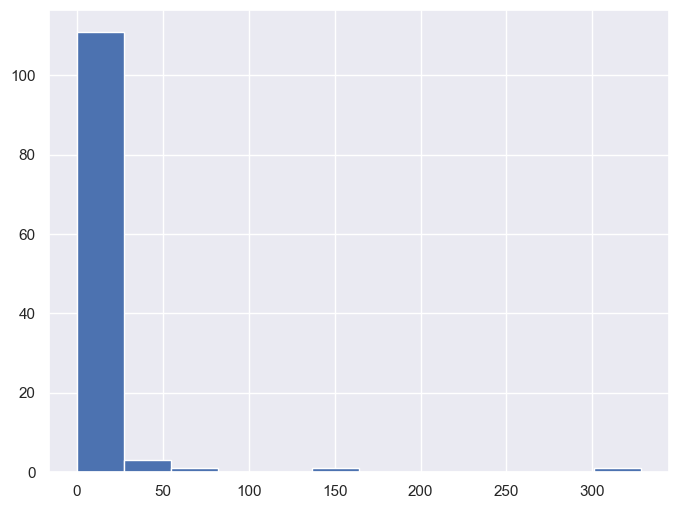

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(8, 6))

plt.hist(df['total_emails'], bins=12)

plt.show()

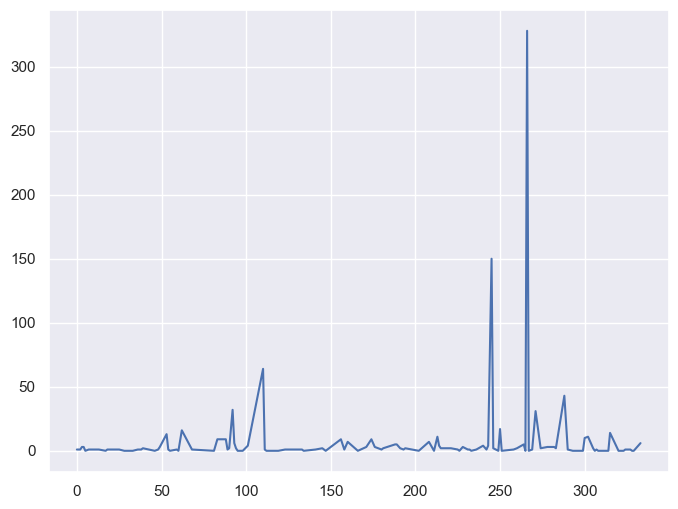

In [285]:
plt.figure(figsize=(8, 6))

plt.plot(df['total_emails'])
plt.show()